#### Cryosat GOPM (LRM Geophysical Ocean Product) Level-2 altimetry data visualization.


In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import netCDF4 as nc
import numpy as np
from pyrsimg import readTiff, imgShow, second_to_dyr


In [2]:
## cryosat-2 GOPM (LRM-GOP) data.
path_cryo2_gopm_l1b = 'data/cryosat-2/CS_OFFL_SIR_GOPM1B_20200908T022521_20200908T022633_C001.nc'  # GOPM:LRM-GOP
# path_cryo2_l2 = 'data/cryosat-2/l2/CS_OFFL_SIR_GOPM_2_20200908T022521_20200908T022633_C001.nc'  
## remote sensing data
path_rsimg = 'data/rsimg/dianchi_s2_20200511_wgs84.tif'


### Data reading

In [3]:
## 1. s3l2 altimetry data
# cryo2_l2 = nc.Dataset(path_cryo2_l2)   ##
cryo2_gopm_l1b = nc.Dataset(path_cryo2_gopm_l1b)
## 2. remote sensing image
rsimg = readTiff(path_rsimg)
# rs_wat, rs_wat_info = readTiff(path_rsimg_wat)


In [4]:
cryo2_gopm_l1b


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    product_name: CS_OFFL_SIR_GOPM1B_20200908T022521_20200908T022633_C001
    processing_stage: OFFL
    reference_document: C2-RS-ACS-ESL-5266 3.4 
    acquisition_station: Kiruna              
    mission: Cryosat
    processing_centre: PDS
    creation_time: UTC=2020-10-07T08:50:48
    sensing_start: 08-SEP-2020 02:25:21.173164
    sensing_stop: 08-SEP-2020 02:26:32.776583
    software_version: SIR1LGO/3.5   
    phase: 4
    cycle_number: 18
    rel_orbit_number: 12290
    abs_orbit_number: 55227
    state_vector_time: UTC=2020-09-08T02:25:56.948750
    delta_ut1: 0.0
    x_position: -1427807.875
    y_position: 6306627.0
    z_position: 2924173.25
    x_velocity: 1426.14501953125
    y_velocity: -2848.265625
    z_velocity: 6822.587890625
    vector_source: doris_precise
    leap_utc:                            
    leap_sign: 0
    leap_err: 0
    product_err: 0
    first_record_time: TAI=2020-0

In [5]:
print('Cryosat-1 l1b data:')
for i in range(len(cryo2_gopm_l1b.variables.keys())):
    print(list(cryo2_gopm_l1b.variables.keys())[i])


Cryosat-1 l1b data:
agc_01_ku
agc_20_ku
agc_cor_01
alt_01
alt_20_ku
cog_cor_01
cor2_applied_20_ku
dop_cor_01_ku
dop_cor_20_ku
echo_numval_20_ku
echo_scale_20_ku
flag_cor_err_01
flag_cor_status_01
flag_instr_conf_rx_bwdt_20_ku
flag_instr_conf_rx_flags_20_ku
flag_instr_conf_rx_in_use_20_ku
flag_instr_conf_rx_trk_mode_20_ku
flag_instr_op_mode_20_ku
flag_mcd_20_ku
flag_trk_cycle_20_ku
h0_applied_20_ku
h0_fai_word_20_ku
h0_lai_word_20_ku
hf_fluct_cor_01
ind_first_meas_20hz_01
ind_meas_1hz_20_ku
int_path_cor_01
internal_cor_sig0_01
inv_bar_cor_01
iono_cor_gim_01
lat_01
lat_20_ku
load_tide_sol1_01
load_tide_sol2_01
lon_01
lon_20_ku
mod_dry_tropo_cor_01
mod_wet_tropo_cor_01
noise_power_20_ku
ns_20_ku
num_meas_20hz_01
ocean_tide_eq_01
ocean_tide_non_eq_01
ocean_tide_sol1_01
ocean_tide_sol2_01
orb_alt_rate_01
orb_alt_rate_20_ku
pole_tide_01
pwr_waveform_20_ku
rec_count_20_ku
scale_factor_20_ku
seq_count_20_ku
solid_earth_tide_01
surf_type_01
time_01
time_20_ku
tracker_range_20_ku
uso_cor_01_ku
u

In [6]:
lon_20_ku_l1b = cryo2_gopm_l1b['lon_20_ku'][:]
lat_20_ku_l1b = cryo2_gopm_l1b['lat_20_ku'][:]
time_20_ku_l1b = cryo2_gopm_l1b['time_20_ku'][:]
waveform_l1b = cryo2_gopm_l1b['pwr_waveform_20_ku'][:]
print(waveform_l1b.shape)  ## waveform


(1295, 128)


In [7]:
# print('Cryosat-2 l2 data:')
# for i in range(len(cryo2_l2.variables.keys())):
#     print(list(cryo2_l2.variables.keys())[i])


In [8]:
# lon_20_ku_l2 = cryo2_l2['lon_20_ku'][:]
# lat_20_ku_l2 = cryo2_l2['lat_20_ku'][:]
# time_20_ku_l2 = cryo2_l2['time_20_ku'][:]
# time_20_ku_dyr_l2 = second_to_dyr(time_20_ku_l2)
# print(time_20_ku_l2.shape)  ## 


### Visualization from global perspective

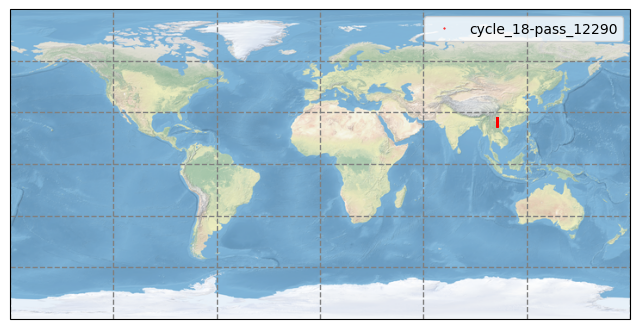

In [9]:
proj = ccrs.PlateCarree(central_longitude=0.0)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=proj)
ax.stock_img()
orbit = 'cycle_'+str(cryo2_gopm_l1b.cycle_number)+'-pass_'+str(cryo2_gopm_l1b.rel_orbit_number)
ax.plot(cryo2_gopm_l1b['lon_20_ku'][:], cryo2_gopm_l1b['lat_20_ku'][:], marker='.', markersize=1, 
                                                        linewidth=0.0, label=orbit, color='red')
ax.gridlines(linewidth=1, color='gray', linestyle='--')
ax.legend()


### Visualization from local perspective

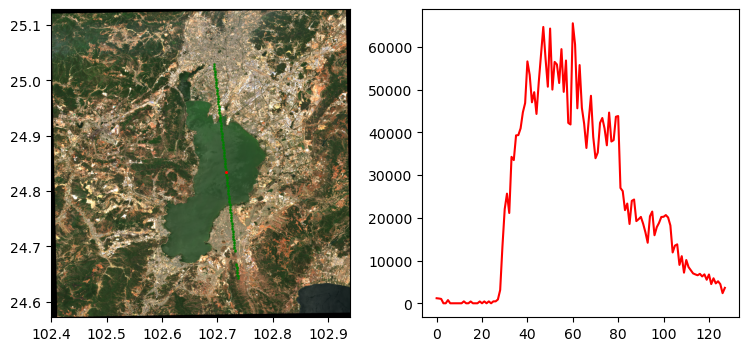

In [10]:
ids = np.where((lat_20_ku_l1b[:]>24.64) & (lat_20_ku_l1b[:]<25.03))[0]  
id = ids[60]
fig, ax = plt.subplots(1,2,figsize=(9,4))
imgShow(rsimg.array, extent=rsimg.geoextent, ax=ax[0])
ax[0].scatter(x=lon_20_ku_l1b[ids], y=lat_20_ku_l1b[ids], s=0.5, color='green')  ## altimetry data
ax[0].scatter(x=lon_20_ku_l1b[id], y=lat_20_ku_l1b[id], s=1.5, color='red')  ## altimetry data
ax[1].plot(waveform_l1b[id], color='red')
